<a href="https://colab.research.google.com/github/pankajti/wqu/blob/main/portfolio_gwp1_p.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1

Fema french 5 factors model

* Rm-Rf
* SMB
* HML
* RMW
* CMA

$ R_{it}-R_{ft}= α_{it}+β_1(R_{Mt}-R_{ft})+β_2SMB_t+β_3HML_t+β_4RMW_t+ β_5CWA_t+ϵ_{it} $


## Rm-Rf
Rm - Rf is market defined as expected return of market   minus the risk free rate of interest. It is also known as market risk premium. Investors who invest in an instrument which is not risk free expect a return as a result of risk they are taking. This additional return which comes due to market is known as market risk premium. IT might have a positive value which means market



### Calculation

Source

## SMB

It is

### Description

### Calculation


## HML

## RMW

## CWA

# Step 2

In [24]:
import pandas as pd
from pandas_datareader.famafrench import FamaFrenchReader,get_available_datasets
import yfinance as yf
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [25]:
#get_available_datasets()

In [26]:
factors = [
 'F-F_Research_Data_Factors_daily',
 'F-F_Research_Data_5_Factors_2x3_daily',]

In [27]:
factor_name=factors[0]
ff_reader = FamaFrenchReader(factor_name)
factors_3_df  = ff_reader.read()[0]

In [28]:
factor_name=factors[1]
ff_reader = FamaFrenchReader(factor_name)
factors_5_df  = ff_reader.read()[0]

<Axes: xlabel='Date'>

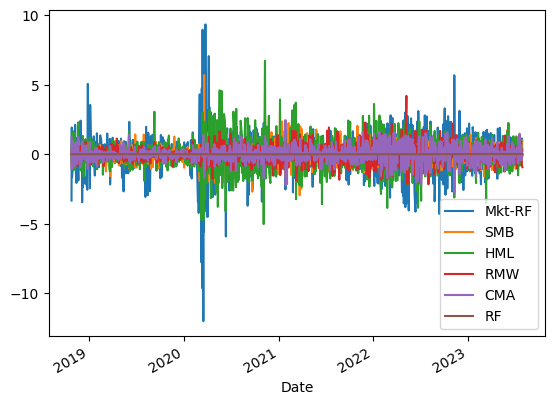

In [29]:
factors_5_df.plot()

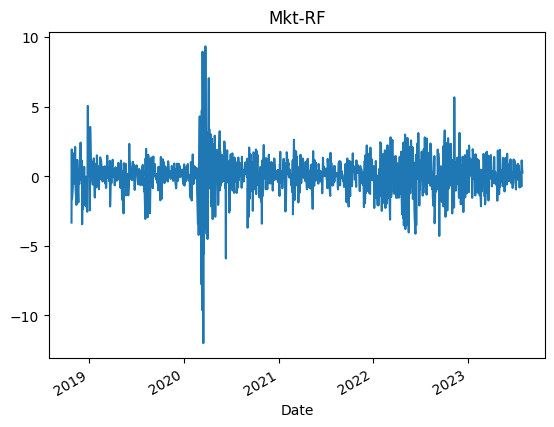

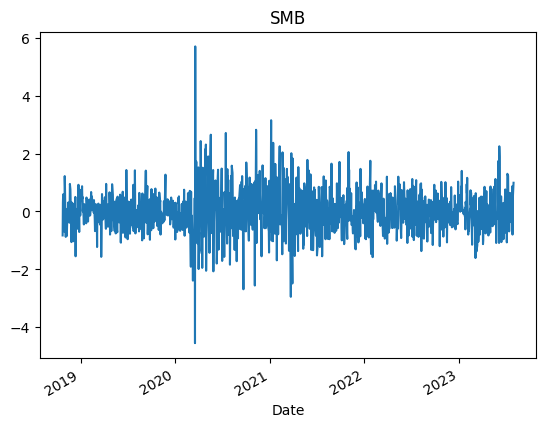

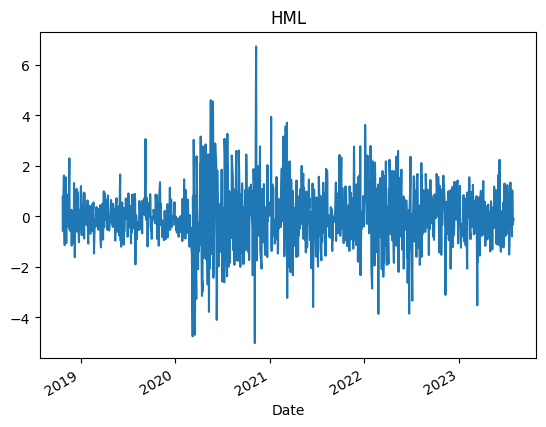

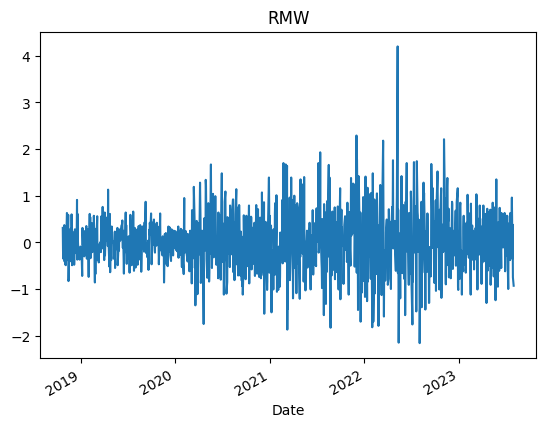

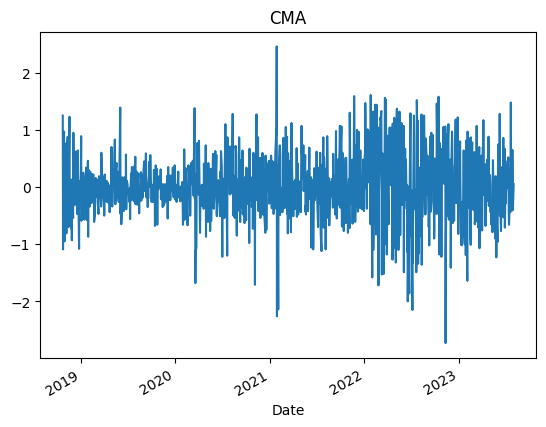

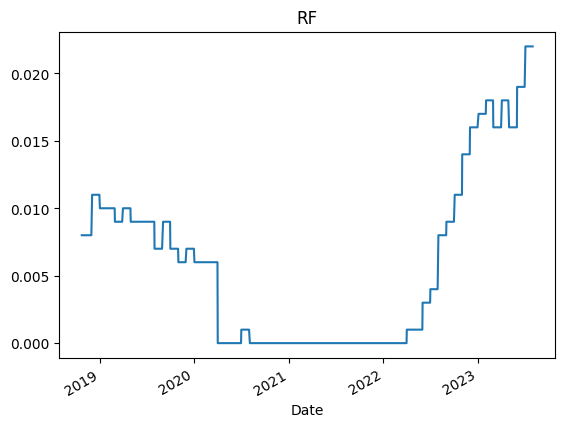

In [30]:
for factor_name in factors_5_df:
  factor= factors_5_df[factor_name]
  factor.plot(title=factor_name)
  plt.show()

In [31]:
factors_5_df_changes = factors_5_df.pct_change()

In [32]:
factors_5_df_changes.corr()

,Mkt-RF,SMB,HML,RMW,CMA,RF
Mkt-RF,1.000000,-0.013298,0.004931,-0.002612,-0.022743,-0.020703
SMB,-0.013298,1.000000,-0.040024,-0.010366,-0.001061,0.021104
HML,0.004931,-0.040024,1.000000,-0.016741,0.057582,0.003013
RMW,-0.002612,-0.010366,-0.016741,1.000000,-0.037331,-0.001421
CMA,-0.022743,-0.001061,0.057582,-0.037331,1.000000,-0.008654
RF,-0.020703,0.021104,0.003013,-0.001421,-0.008654,1.000000


In [33]:
ten_year_treasury = yf.download('^TNX', start ='2021-01-01', end = '2023-01-01')

[*********************100%%**********************]  1 of 1 completed


# Step 3

In [34]:
ten_year_treasury_return = ten_year_treasury.Close.pct_change()

In [23]:
data = factors_3_df.join(ten_year_treasury_return).dropna()

In [36]:
data.head()

,Mkt-RF,SMB,HML,RF,Close
Date,,,,,
2021-01-05,0.86,1.23,0.49,0.0,0.041439
2021-01-06,0.79,2.14,3.94,0.0,0.091100
2021-01-07,1.76,0.33,-0.83,0.0,0.027831
2021-01-08,0.51,-0.75,-1.37,0.0,0.031746
2021-01-11,-0.51,0.26,1.26,0.0,0.024434


In [37]:
from sklearn.model_selection import train_test_split

In [43]:
X= data[['Mkt-RF',	'SMB',	'HML'	]]

y=data.Close.pct_change()[1:]
X=X[1:]


In [44]:
X_train, X_test, y_train, y_test= train_test_split(X,y, shuffle=False)

In [ ]:
x = sm.add_constant(x)

# performing the regression
# and fitting the model
result = sm.OLS(y, x).fit()

# printing the summary table
print(result.summary())

# Step 4

# Step 5

Using the daily factor data:

(a) Compute the correlation matrix of the factor returns

(b) Compute the covariance matrix of the factor returns

(c) Compare and contrast the 2 matrices, emphasizing any important differences.

In [ ]:
import urllib.request
import zipfile
ff_url = "https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/ftp/F-F_Research_Data_5_Factors_2x3_daily_CSV.zip"

# Download the FF 5 Factors file from the source
urllib.request.urlretrieve(ff_url,'fama_french.zip')
zip_file = zipfile.ZipFile('fama_french.zip', 'r')
zip_file.extractall()
zip_file.close()

import pandas as pd
ff_factors_raw = pd.read_csv('F-F_Research_Data_5_Factors_2x3_daily.CSV', skiprows = 3)
print(ff_factors_raw.tail())

In [ ]:
#Find the relevant index related to the relevant 3 year period from 02 January 2020 to 31 Dec 2022
print(ff_factors_raw.iloc[14220:14980],)

In [ ]:
#Extract the period from 02 January 2020 to 31 Dec 2022
ff_factors = ff_factors_raw.iloc[14223:14979]
print(ff_factors)

In [ ]:
ff_factors.columns = ["Date", "Mkt-RF", "SMB", "HML", "RMW", "CMA", "RF"]
ff_factors['Date'] = pd.to_datetime(ff_factors['Date'].astype(str), format='%Y-%m-%d', errors='coerce')
print(ff_factors)

In [ ]:
# Compute the correlation matrix
correlation_matrix = ff_factors.corr()

print("The Correlation Matrix among the daily returns of the Fama-French 5 factors for the period 02 January 2020 to 31 December 2022 are given as:")
correlation_matrix


In [ ]:
# Compute the covariance matrix
covariance_matrix = ff_factors.cov()

print("The covariance Matrix among the daily returns of the Fama-French 5 factors for the period 02 January 2020 to 31 December 2022 are given as:")
covariance_matrix

From the correlation matrix, we can determine the direction and strength of correlation among the 5 factors. On the other hand, from the covariance matrix, we can determine the direction as well as the absolution co-variance value among the 5 factors.

Comparing and contrasting between the two matrices, we can conclude that both matrix provides the same direction in terms of correlation among the various factors. However, it can be seen that the (Mk-RF) returns are most affected by SMB factor in the positive direction, and most affected by CMA is the negative direction.

At the same time, we can conclude that the variance of Mkt-RF is the highest, HML factor also has the highest variance, followed by SMB.

# Step 6

Report in tabular form how the extra 2 factors (CMA and RMW) affect the results


In [ ]:
print("The covariance Matrix among the daily returns of the Fama-French 5 factors for the period 02 January 2020 to 31 December 2022 are given as:")
covariance_matrix


From the table, we can infer that both CMA and RMW have negative covariance with Mkt-RF, which imples that CMA and RMW move in opposite direction to Mkt-RF. As such, both factors can be suitable as a diversification tool, potentially in order to reduce the variance of Mkt-RF. In particular, the value of the covariance of CMA is higher than RMW, hence if only one is to be chosen as the factor for diversification, CMA could be a more appropriate choice.


# Step 7

## H - Markowitz portfolio optimization

We will first import the 5 asset for our analysis choosing the same time perio

In [ ]:
import yfinance as yf
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

# Define the list of 5 stocks
stocks = ['AAPL', 'GOOGL', 'MSFT', 'AMZN', 'TSLA']

# Download historical stock price data
data = yf.download(stocks, start='2020-01-01', end='2022-12-31')['Adj Close']

In [ ]:
# Create a line plot for each stock
for stock in stocks:
    plt.plot(data[stock], label=stock)

# Set the title and labels for the plot
plt.title('Adjusted Closing Price (2020-2022)')
plt.xlabel('Date')
plt.ylabel('Adjusted Closing Price ($)')

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()

In [ ]:
# Calculate daily returns
returns = data.pct_change().dropna()

# Define the number of assets
n_assets = len(stocks)

# Calculate expected returns and covariance matrix
mu = returns.mean().values
cov_matrix = returns.cov().values

# Define the optimization variables
weights = cp.Variable(n_assets)
port_return = mu @ weights
port_variance = cp.quad_form(weights, cov_matrix)

# Define the optimization problem
lambda_param = 0.1  # Adjust this parameter to control the trade-off between risk and return
objective = cp.Maximize(port_return - lambda_param * port_variance)
constraints = [cp.sum(weights) == 1, weights >= 0]
problem = cp.Problem(objective, constraints)

# Solve the optimization problem
problem.solve()

# Get the optimal allocations
optimal_allocations = weights.value

# Calculate the portfolio value over time
initial_value = 1000
portfolio_value = [initial_value]
for i, row in returns.iterrows():
    returns_i = row.values
    portfolio_value_i = portfolio_value[-1] * (1 + np.dot(optimal_allocations, returns_i))
    portfolio_value.append(portfolio_value_i)

# Calculate the ultimate return
ultimate_return = (portfolio_value[-1] - initial_value) / initial_value

# Plot the time series of the portfolio value
dates = returns.index
plt.plot(dates, portfolio_value[1:])
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.title('Portfolio Value Over Time')
plt.show()

In [ ]:
# Print the ultimate return
print(f"Ultimate Return: {ultimate_return}")

In [ ]:
for i in range(len(stocks)):
    print(f"Stock: {stocks[i]}, Allocation: {optimal_allocations[i]}")

# References

https://en.wikipedia.org/wiki/Fama%E2%80%93French_three-factor_model

https://www.bauer.uh.edu/rsusmel/phd/Fama-French_JFE93.pdf
